<a href="https://colab.research.google.com/github/sabrina0411/MachineLearning/blob/main/Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
working_dir = "/content/gdrive/MyDrive/Waste"
dataset = working_dir + "/SplitDataset"

In [ ]:
import os
os.listdir(dataset)
train_path=dataset+"/train"
test_path=dataset+"/test"
val_path=dataset+"/val"

In [ ]:
# define a function for reading images from path.

import cv2

def read_data(path):
  image_array_data = []
  for img_class_dir in os.listdir(path):
    class_path = path + "/" + img_class_dir
    for img in os.listdir(class_path):
      image_path = class_path + "/" + img
      # print("Reading Image: ", image_path)
      image_cv2_array = cv2.imread(image_path)
      image_cv2_array = cv2.resize(image_cv2_array, (224, 224))
      image_array_data.append(image_cv2_array)
  return image_array_data


## **Split**

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
input_folder = '/content/gdrive/MyDrive/Waste/dataset'

# Split with a ratio.
#Train, val, test
splitfolders.ratio(input_folder, output="/content/gdrive/MyDrive/Waste/SplitDataset",
                   seed=42, ratio=(.7, .2, .1),
                   group_prefix=None)

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# enable oversampling of imbalanced datasets, works only with fixed
splitfolders.fixed(input_folder, output="/content/gdrive/MyDrive/Waste/SplitDataset",
                   seed=42, fixed=(35, 20),
                   oversample=False, group_prefix=None)

Copying files: 2080 files [03:35,  9.65 files/s]
Copying files: 2080 files [01:34, 21.95 files/s]


# **Read Data**

In [ ]:
x_train = read_data(train_path)
x_test = read_data(test_path)
x_valid = read_data(val_path)
# i have images now for train test and validation in opencv (cv2) object.

In [ ]:
# convert into numpy array
import numpy as np

np_x_train = np.array(x_train)
np_x_test = np.array(x_test)
np_x_valid = np.array(x_valid)

In [ ]:
x_train = np_x_train
x_test = np_x_test
x_valid = np_x_valid

In [ ]:
# convert all number into 0-1 for faster calculation.
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_valid/255.0

In [ ]:
# import librabry
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

print(tf. __version__)

# metal - 0
# plastic - 1
# data generator
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['metal', 'plastic'], batch_size=16)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
    ).flow_from_directory(
    directory=val_path,
    target_size=(224,224),
    classes=['metal', 'plastic'], batch_size=16)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
    ).flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    classes=['metal', 'plastic'], batch_size=16)

2.15.0
Found 1970 images belonging to 2 classes.
Found 485 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [ ]:
y_train = train_batches.classes
y_test = test_batches.classes
y_val = valid_batches.classes

In [ ]:
print(train_batches.classes)
print(train_batches.class_indices)

[0 0 0 ... 1 1 1]
{'metal': 0, 'plastic': 1}


In [ ]:
print(test_batches.classes)
print(test_batches.class_indices)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
{'metal': 0, 'plastic': 1}


In [ ]:
print(valid_batches.classes)
print(valid_batches.class_indices)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
{'metal': 0, 'p

In [ ]:
y_train.shape,y_test.shape,y_val.shape

((1970,), (208,), (485,))

In [ ]:
x_train.shape, x_test.shape, x_val.shape

((1970, 224, 224, 3), (208, 224, 224, 3), (485, 224, 224, 3))

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.models import Sequential,load_model,Model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, EfficientNetB4

# from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential

In [ ]:
import os
import shutil
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
import tensorflow
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.metrics import Recall,Precision
%matplotlib inline
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
from keras import models, layers
from keras.utils import to_categorical
from pathlib import Path
# from sklearn.metrics import classification_report, confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.models import Sequential

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [ ]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# **ResNet152**

In [ ]:
base_model = tf.keras.applications.resnet.ResNet152(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet')

234698864/234698864 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
base_model.trainable=False
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax'))
model.summary()
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               6

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('VGG152 Garbage Classifier.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(
    train_batches,
    epochs=5,
    validation_data=valid_batches,
    verbose=1,
    callbacks = [es, mc]
)

Epoch 1/5
124/124 [==============================] - ETA: 0s - loss: 0.2941 - accuracy: 0.8995

124/124 [==============================] - 1377s 11s/step - loss: 0.2941 - accuracy: 0.8995 - val_loss: 0.0737 - val_accuracy: 0.9814
Epoch 2/5
124/124 [==============================] - ETA: 0s - loss: 0.1372 - accuracy: 0.9467

124/124 [==============================] - 1351s 11s/step - loss: 0.1372 - accuracy: 0.9467 - val_loss: 0.0897 - val_accuracy: 0.9711
Epoch 3/5
124/124 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9452

124/124 [==============================] - 1346s 11s/step - loss: 0.1270 - accuracy: 0.9452 - val_loss: 0.0518 - val_accuracy: 0.9794
Epoch 4/5
124/124 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.9635

124/124 [==============================] - 1349s 11s/step - loss: 0.1029 - accuracy: 0.9635 - val_loss: 0.0362 - val_accuracy: 0.9835
Epoch 5/5
124/124 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9782

124/124 [==============================] - 1342s 11s/step - loss: 0.0607 - accuracy: 0.9782 - val_loss: 0.0444 - val_accuracy: 0.9856


In [ ]:
model.evaluate(test_batches)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

([<matplotlib.axis.XTick at 0x7b167c8e8640>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

([<matplotlib.axis.XTick at 0x7b167c93c220>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

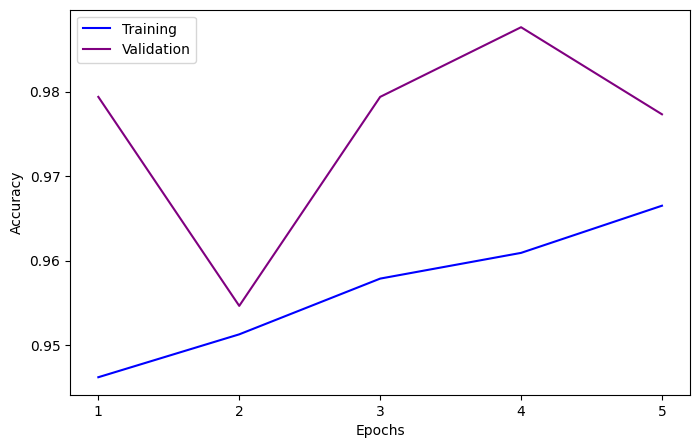

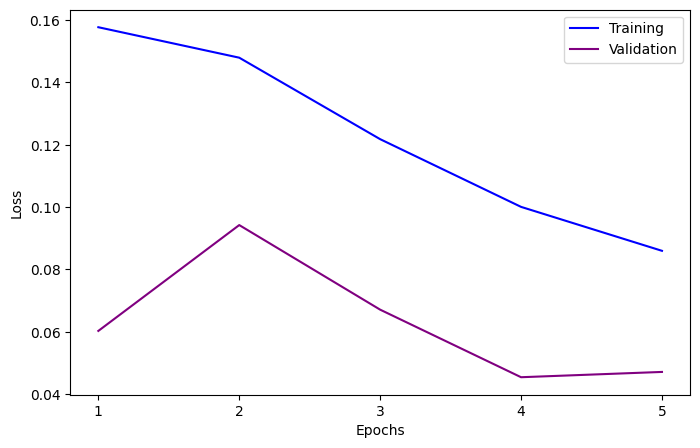

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['accuracy']
validation_accuracy =history.history['val_accuracy']

epochs1 = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(8,5))
plt.plot(epochs1,accuracy,c="blue",label="Training")
plt.plot(epochs1,validation_accuracy,c="purple",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs1)
plt.legend()

epochs2 = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(8,5))
plt.plot(epochs2,loss,c="blue",label="Training")
plt.plot(epochs2,validation_loss,c="purple",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs2)
plt.legend()


In [ ]:
No_Of_Samples = len(test_batches.filenames)

testPredictions = model.predict(test_batches, steps = No_Of_Samples)

y_pred=np.argmax(testPredictions,axis=1)
y_pred

 13/208 [>.............................] - ETA: 27:06

208/208 [==============================] - 111s 484ms/step


array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

<Axes: >

array([[ 10,  44],
       [ 42, 112]])

Text(0.5, 1.0, 'Confusion Matrix of ResNet152')

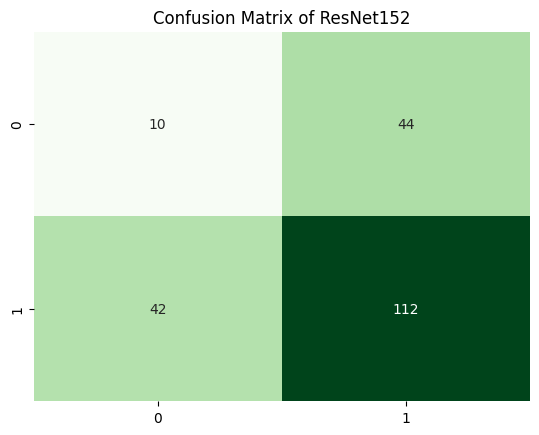

In [ ]:
cm = confusion_matrix(test_batches.classes, y_pred)
# sns.heatmap(cf, annot=True)
sns.heatmap(cm, cmap = "Greens", annot=True, cbar=False, fmt='g')
cm
plt.title("Confusion Matrix of ResNet152")

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.19      0.19      0.19        52
           1       0.73      0.72      0.72       156

    accuracy                           0.59       208
   macro avg       0.46      0.46      0.46       208
weighted avg       0.59      0.59      0.59       208



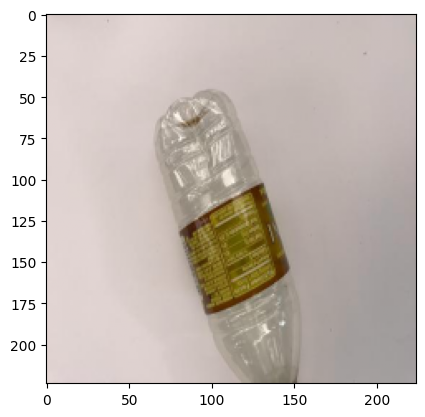

1/1 [==============================] - 1s 517ms/step
[[0.00180777 0.99819225]]


In [ ]:
idx = random.randint(0, len(y_test)-1) # subtract 1 to account for zero indexing

# No need to load the image, it's already in x_test
img = x_test[idx]

plt.imshow(img) # Display the image
plt.show()

y_pred = model.predict(img.reshape(1, 224, 224, 3)) # predict on the reshaped image
print(y_pred)


y_pred = [
    [0.00180777, 0.99819225]
    ]

if y_pred[0][0] > y_pred[0][1]:
    print("metal")
else:
    print("plastic")


if y_pred[0][0] < y_pred[0][1]:
    print("plastic")
else:
    print("metal")


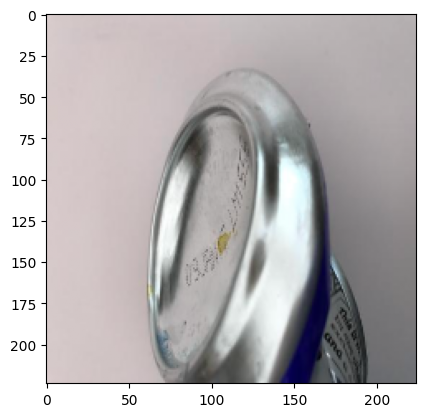

1/1 [==============================] - 1s 507ms/step
Predicted class: Metal


In [ ]:
import random
idx = random.randint(0, len(y_test) - 1)

img = x_test[idx]

plt.imshow(img)
plt.show()

y_pred = model.predict(img.reshape(1, 224, 224, 3))

# print(f"Predicted probabilities: {y_pred}")

predicted_class = np.argmin(y_pred, axis=1)[0]

if predicted_class == 0:
    print('Predicted class: Metal')
else:
    print('Predicted class: Plastic')

# predicted_probability = y_pred[0][predicted_class]
# print(f"Probability of the predicted class: {predicted_probability:.4f}")

In [ ]:
# model = Sequential()
# base_model.trainable=True
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(units=512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(units=128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(units=2, activation='softmax'))
# model.summary()
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# mc = ModelCheckpoint('VGG152 Garbage Classifier.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(
#     train_batches,
#     epochs=5,
#     validation_data=valid_batches,
#     verbose=1,
#     callbacks = [es, mc]
# )

In [ ]:
# model.evaluate(test_batches)

# **InceptionV3**

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)

output  = Dense(units=2, activation='softmax')(x)
model_07 = Model(InceptionV3_model.input, output)

In [ ]:
model_07.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_2 (Bat  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization_2[0]

In [ ]:
model_07.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_07.fit(
    train_batches,
    validation_data=valid_batches,
    verbose=1,
    epochs=2,
    callbacks = [es, mc]
)

Epoch 1/2
124/124 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.7787

124/124 [==============================] - 420s 3s/step - loss: 0.5195 - accuracy: 0.7787 - val_loss: 0.4820 - val_accuracy: 0.7588
Epoch 2/2
124/124 [==============================] - ETA: 0s - loss: 0.4324 - accuracy: 0.8015

124/124 [==============================] - 423s 3s/step - loss: 0.4324 - accuracy: 0.8015 - val_loss: 0.3389 - val_accuracy: 0.8680


In [ ]:
model_07.evaluate(test_batches)

13/13 [==============================] - 33s 2s/step - loss: 0.3764 - accuracy: 0.8558


[0.37640607357025146, 0.8557692170143127]

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

([<matplotlib.axis.XTick at 0x7b1673704940>,
 [Text(1, 0, '1'), Text(2, 0, '2')])

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

([<matplotlib.axis.XTick at 0x7b1673723550>,
 [Text(1, 0, '1'), Text(2, 0, '2')])

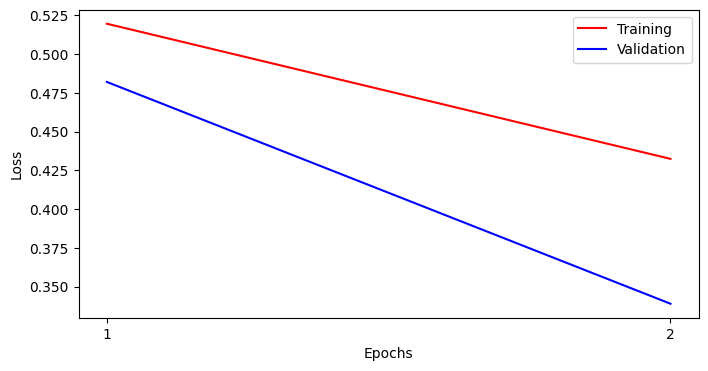

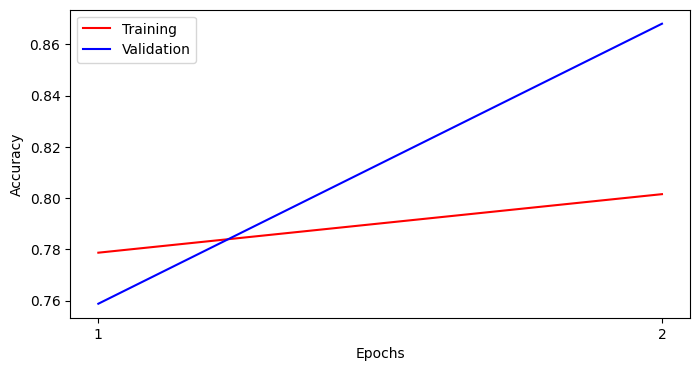

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['accuracy']
validation_accuracy =history.history['val_accuracy']

epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(8,4))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

epochs1 = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(8,4))
plt.plot(epochs1,accuracy,c="red",label="Training")
plt.plot(epochs1,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs1)
plt.legend()

In [ ]:
No_Of_Samples = len(test_batches.filenames)

testPredictions = model_07.predict(test_batches, steps = No_Of_Samples)

y_pred=np.argmax(testPredictions,axis=1)
y_pred

 13/208 [>.............................] - ETA: 8:21

208/208 [==============================] - 36s 150ms/step


array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

<Axes: >

array([[ 15,  39],
       [ 45, 109]])

Text(0.5, 1.0, 'Confusion Matrix of InceptionV3')

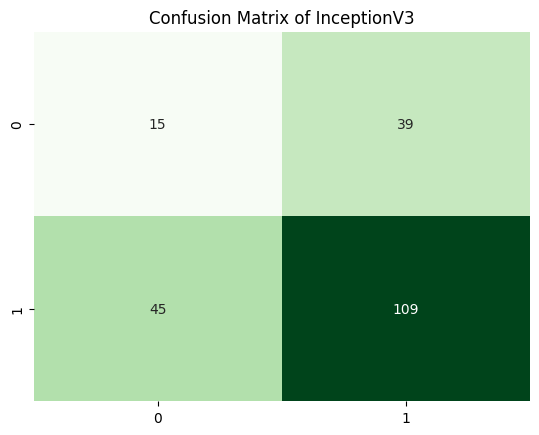

In [ ]:
cm = confusion_matrix(test_batches.classes, y_pred)
sns.heatmap(cm, cmap = "Greens", annot=True, cbar=False, fmt='g')
cm
plt.title("Confusion Matrix of InceptionV3")

In [ ]:
print(classification_report(test_batches.classes, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.28      0.26        54
           1       0.74      0.71      0.72       154

    accuracy                           0.60       208
   macro avg       0.49      0.49      0.49       208
weighted avg       0.61      0.60      0.60       208



# **DenseNet**

In [ ]:
# import keras
# from keras.models import Model
# from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
#     BatchNormalization, concatenate, AveragePooling2D
# from keras.optimizers import Adam

def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x

def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters

def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters

def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(32, 32, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

In [ ]:
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 2
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model.summary()


# training
batch_size = 32
epochs = 10
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 32, 32, 24)           648       ['input_4[0][0]']             
                                                                                                  
 activation_94 (Activation)  (None, 32, 32, 24)           0         ['conv2d_94[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 24)           0         ['activation_94[0][0]']       
 g2D)                                                                                       

In [ ]:
history=model.fit(
    train_batches,
    epochs=3,
    batch_size=batch_size,
    shuffle=True,
    validation_data=valid_batches)

Epoch 1/3
124/124 [==============================] - 764s 6s/step - loss: 0.2980 - accuracy: 0.8807 - val_loss: 0.2930 - val_accuracy: 0.8990
Epoch 2/3
124/124 [==============================] - 751s 6s/step - loss: 0.3097 - accuracy: 0.8772 - val_loss: 0.2245 - val_accuracy: 0.9052
Epoch 3/3
124/124 [==============================] - 781s 6s/step - loss: 0.2686 - accuracy: 0.8949 - val_loss: 0.2491 - val_accuracy: 0.9031


In [ ]:
model.evaluate(test_batches)

13/13 [==============================] - 23s 2s/step - loss: 0.2192 - accuracy: 0.9087


[0.21920561790466309, 0.9086538553237915]

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

([<matplotlib.axis.XTick at 0x7b16702c4d00>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

([<matplotlib.axis.XTick at 0x7b16703113c0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

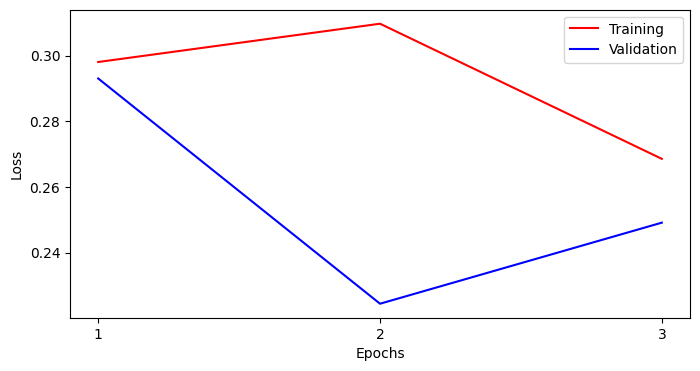

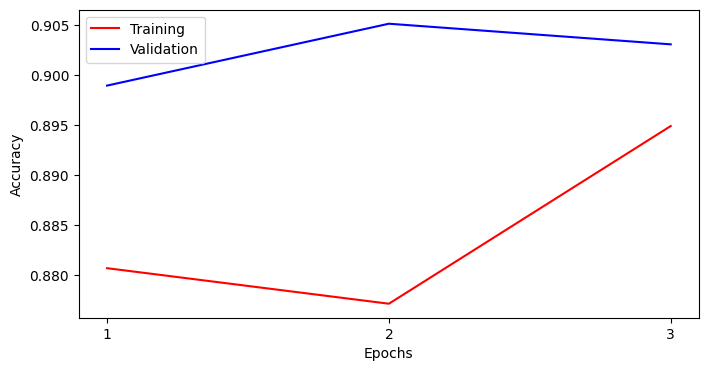

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['accuracy']
validation_accuracy =history.history['val_accuracy']

epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(8,4))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

epochs1 = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(8,4))
plt.plot(epochs1,accuracy,c="red",label="Training")
plt.plot(epochs1,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs1)
plt.legend()

<Axes: >

array([[ 15,  39],
       [ 45, 109]])

Text(0.5, 1.0, 'Confusion Matrix of DenseNet')

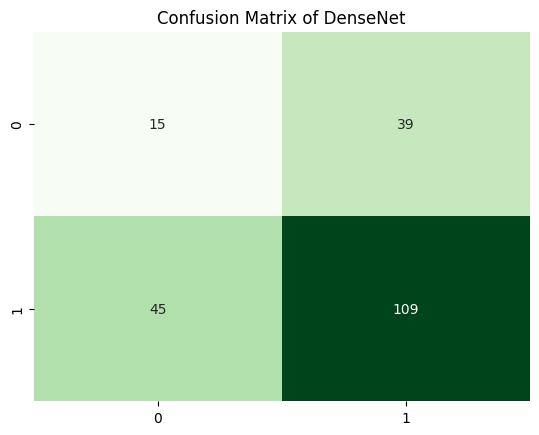

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'Greens', annot=True, cbar=False, fmt='g')
cm
plt.title("Confusion Matrix of DenseNet")

## **BarChart**

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Accuracy (%)')

Text(0.5, 1.0, 'Accuracy in different Model')

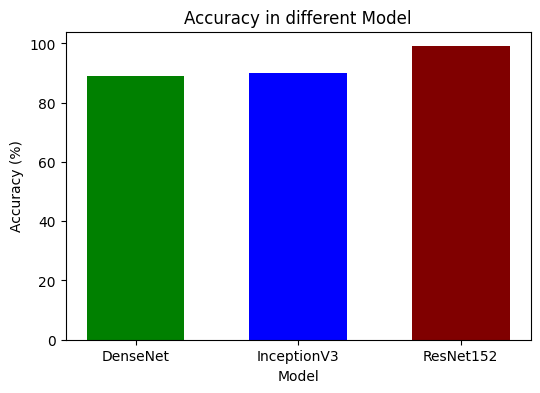

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your machine learning results)
classes3 = ['DenseNet']
accuracies3 = [89]
classes2 = ['InceptionV3']
accuracies2 = [90]
classes1 = ['ResNet152']
accuracies1 = [98]

fig = plt.figure(figsize = (6, 4))

# Create a bar chart
plt.bar(classes3, accuracies3, color='green', width=0.6)
plt.bar(classes2, accuracies2, color='blue', width=0.6)
plt.bar(classes1, accuracies1, color='maroon', width=0.6)


# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy in different Model')

# Show the bar chart
plt.show()